- Project Description: The aim of this project is to perform EDA on a dataset
containing bike sharing data to gain insights into patterns of bike usage, popular
routes, and other factors that may impact bike sharing usage. The project will involve
data cleaning, data visualization, and statistical analysis to identify trends and patterns
in the data.
- Problem Statement: Bike sharing has become a popular mode of
transportation in many cities around the world. However, bike sharing companies need
to understand the factors that impact bike usage to optimize their operations and
better serve their customers. By performing EDA on bike sharing data, we can identify
patterns in bike usage that can inform decision-making and help bike sharing
companies improve their services.

### importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + 
 Scattered clouds
 - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (tt_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (tt_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registere

### Read the data 

In [2]:
day=pd.read_csv("day.csv")

In [3]:
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
hour=pd.read_csv("hour.csv")

In [5]:
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### check unique values

In [6]:
hour.apply(lambda x:len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

### Pre-Processing

In [7]:
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
hour=hour.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})

In [9]:
hour.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Droping unwanted columns

In [10]:
hour=hour.drop(columns=['instant','dteday','year'])

In [11]:
hour.head()

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### changing DType of int cols to Category

In [12]:
cols = ['season' , 'month' , 'hour' , 'holiday' , 'weekday' , 'workingday' , 'weather']

In [13]:
for col in cols:
    hour[col] = hour[col].astype('category')

In [14]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   month       17379 non-null  category
 2   hour        17379 non-null  category
 3   holiday     17379 non-null  category
 4   weekday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weather     17379 non-null  category
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   humidity    17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


### Exploratory Data Analysis

#### 1:Showing count of Bike Sharing During Weekdays

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

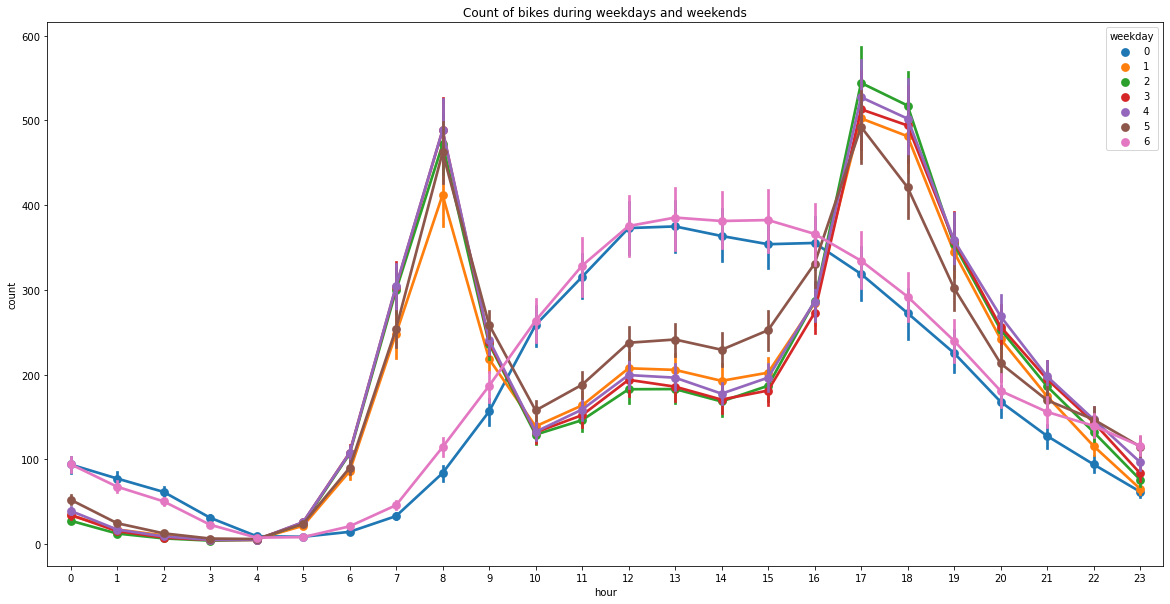

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=hour, x='hour', y='count', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

#### 2:Showing Count of bikes during weekdays and weekends: Unregistered users

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Unregistered users')]

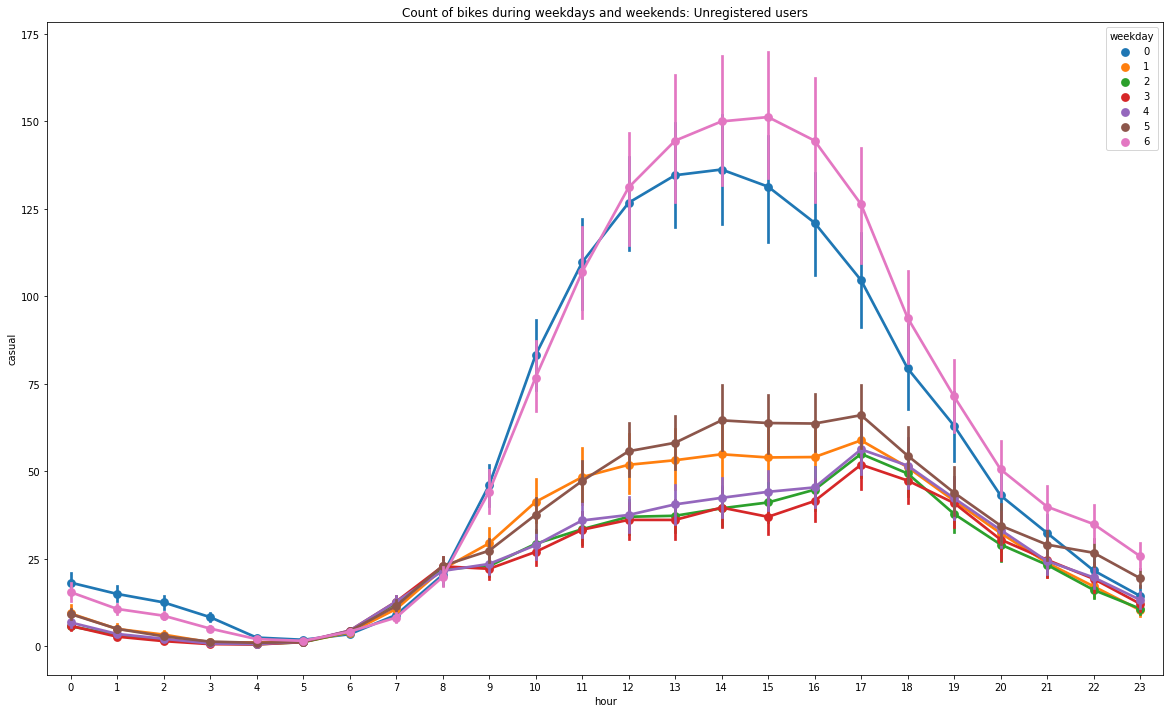

In [16]:
fig, ax = plt.subplots(figsize=(20,12))
sns.pointplot(data=hour, x='hour', y='casual', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Unregistered users')

### 3:Count of bikes during weekdays and weekends: Registered users

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Registered users')]

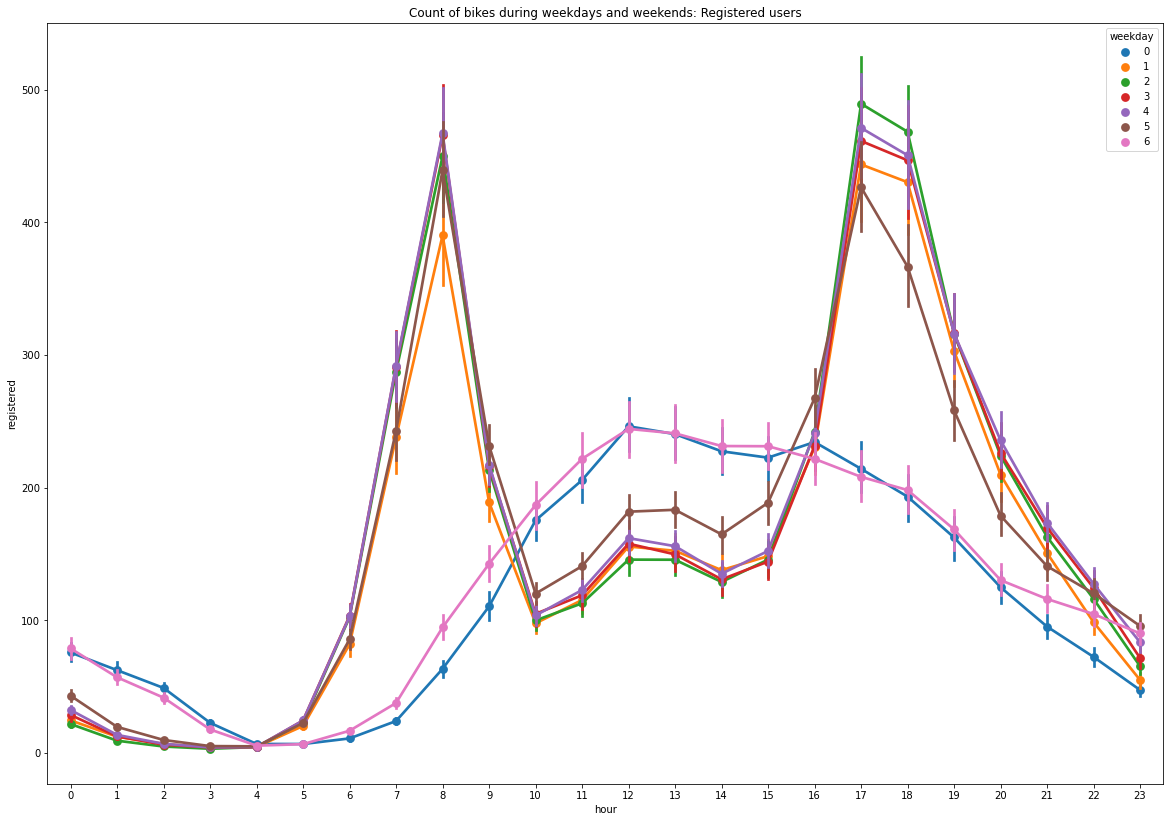

In [17]:
fig, ax = plt.subplots(figsize=(20,14))
sns.pointplot(data=hour, x='hour', y='registered', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Registered users')

#### 4:Count of bikes during different weathers

[Text(0.5, 1.0, 'Count of bikes during different weathers')]

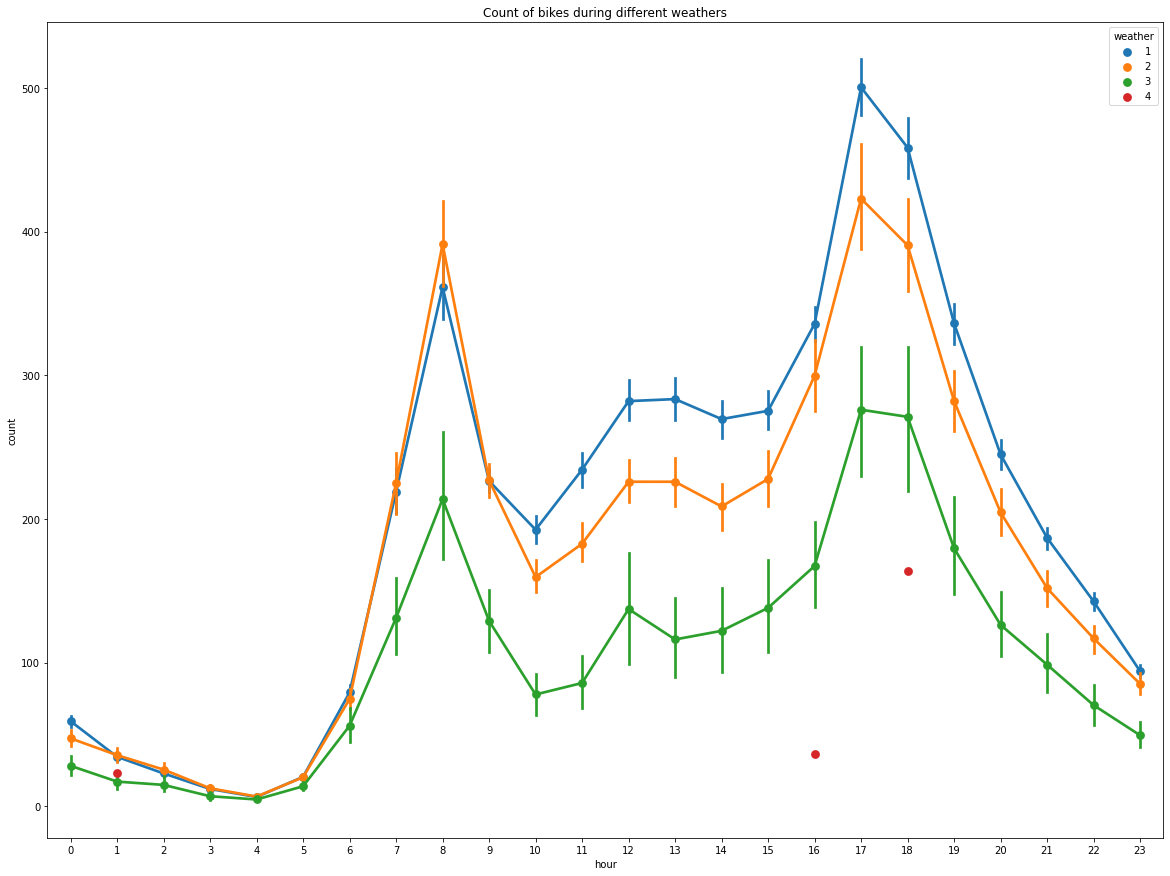

In [18]:
fig, ax = plt.subplots(figsize=(20,15))
sns.pointplot(data=hour, x='hour', y='count', hue='weather', ax=ax)
ax.set(title='Count of bikes during different weathers')

#### 5:Count of bikes during different seasons

[Text(0.5, 1.0, 'Count of bikes during different seasons')]

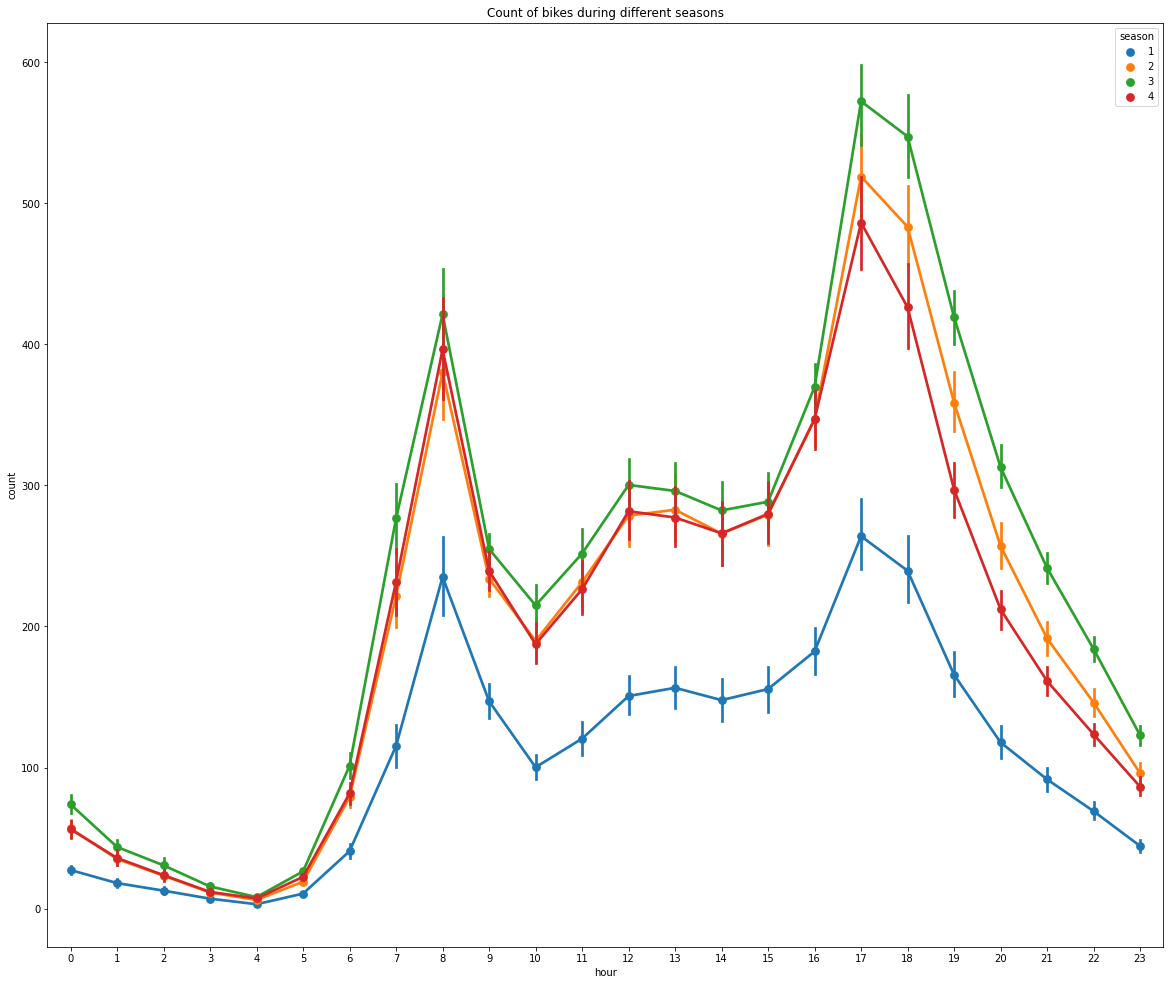

In [19]:
fig, ax = plt.subplots(figsize=(20,17))
sns.pointplot(data=hour, x='hour', y='count', hue='season', ax=ax)
ax.set(title='Count of bikes during different seasons')

#### 6:Count of bikes during different months

[Text(0.5, 1.0, 'Count of bikes during different months')]

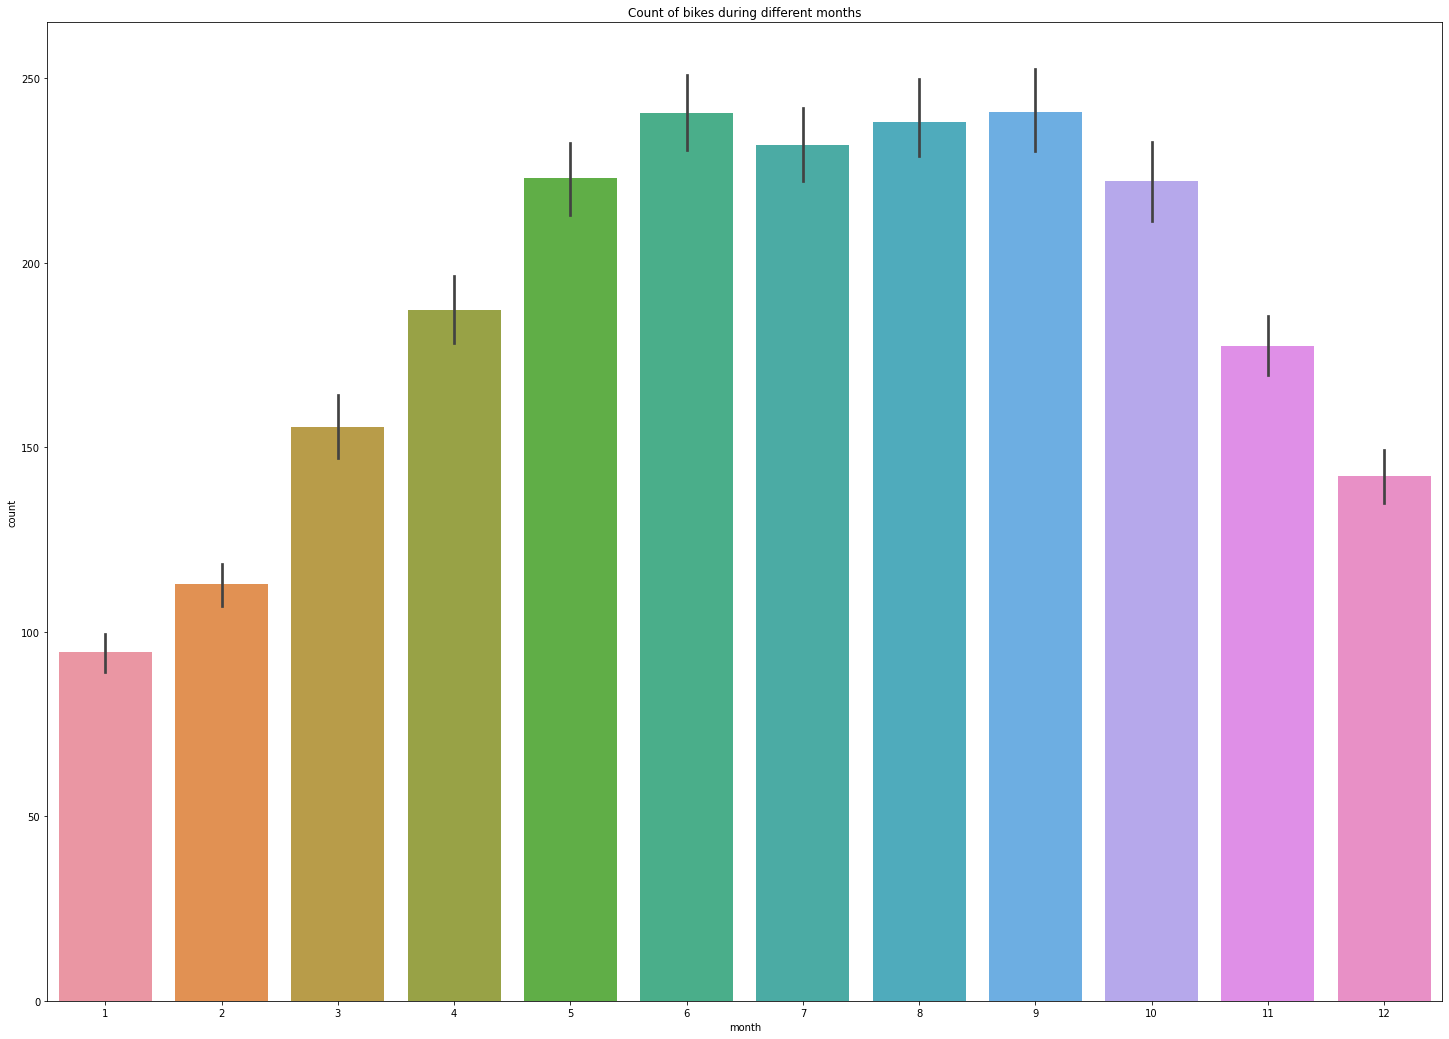

In [20]:
fig, ax = plt.subplots(figsize=(25,18))
sns.barplot(data=hour, x='month', y='count', ax=ax)
ax.set(title='Count of bikes during different months')

#### 7:Count of bikes during different days

[Text(0.5, 1.0, 'Count of bikes during different days')]

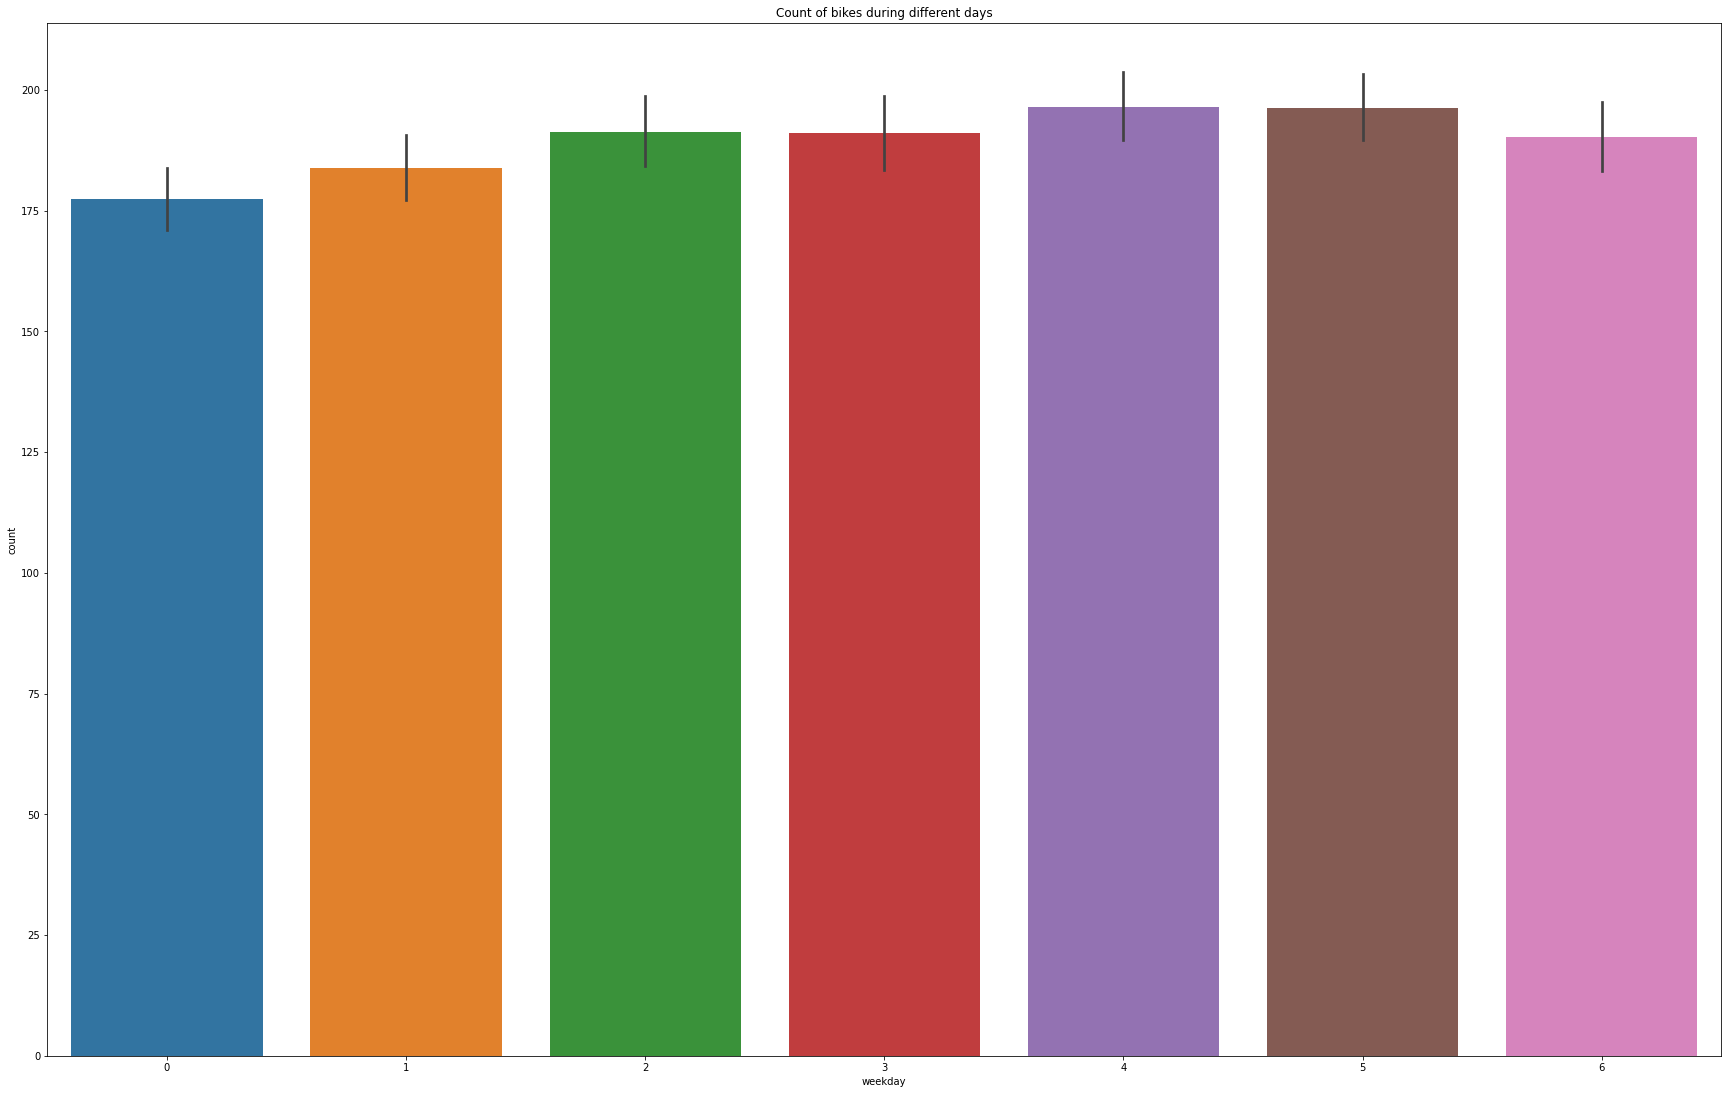

In [21]:
fig, ax = plt.subplots(figsize=(30,19))
sns.barplot(data=hour, x='weekday', y='count', ax=ax)
ax.set(title='Count of bikes during different days')

[Text(0.5, 1.0, 'Relation between humidity and users')]

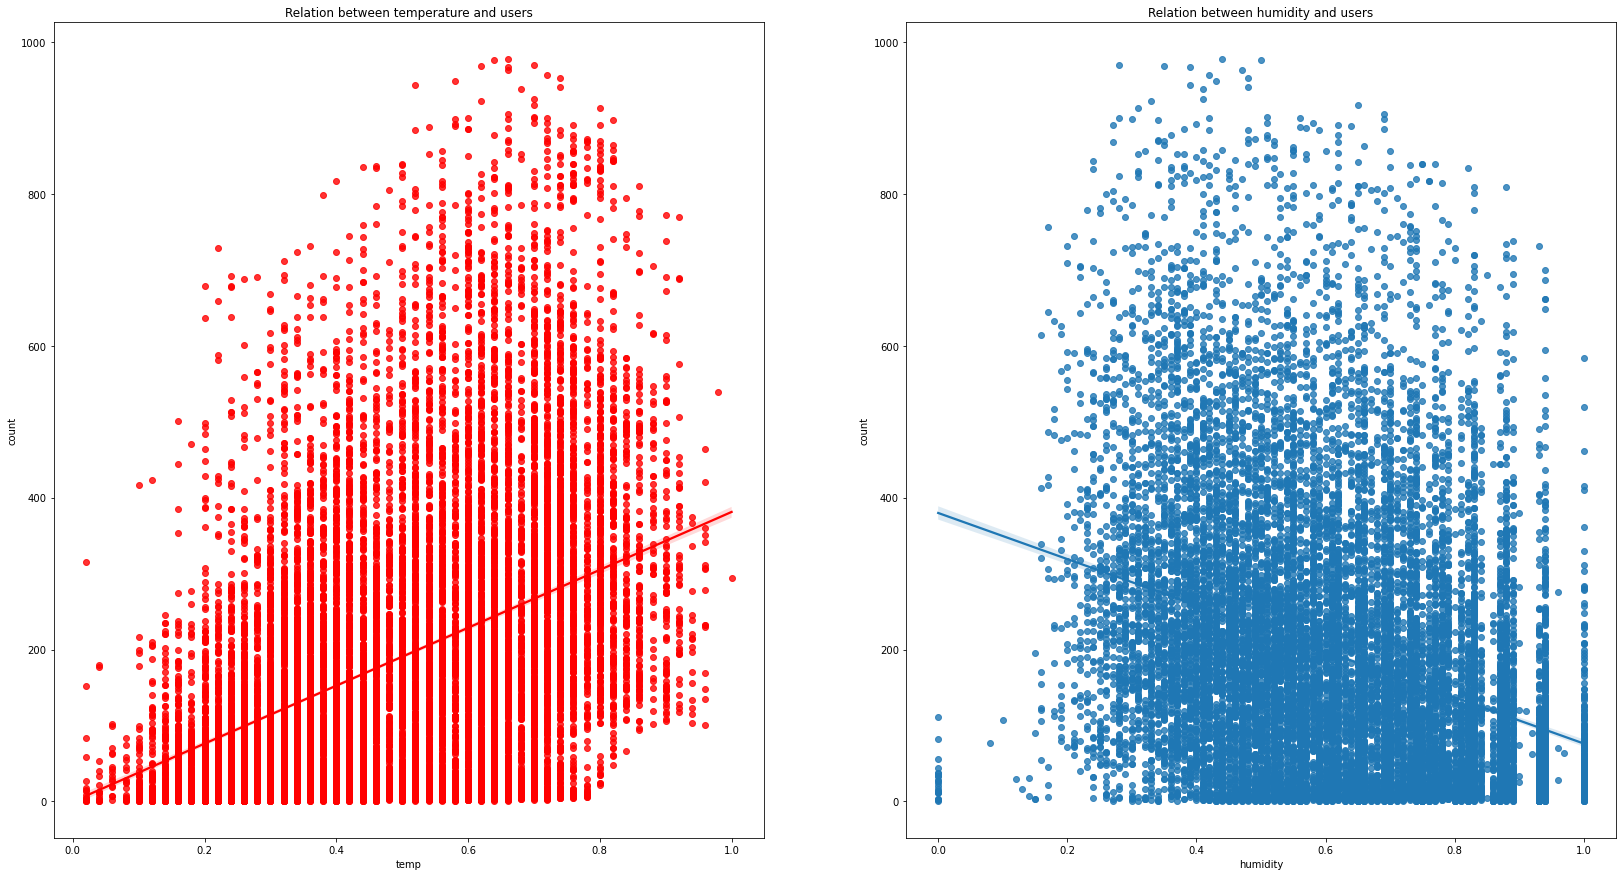

In [22]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(28,15))
sns.regplot(x=hour['temp'], y=hour['count'], ax=ax1 ,color='red')
ax1.set(title="Relation between temperature and users")
sns.regplot(x=hour['humidity'], y=hour['count'], ax=ax2)
ax2.set(title="Relation between humidity and users")